# Otimização Não-Linear: Aula 2

Bibliografia sugerida para tema de diferenciabilidade de funções multivariadas: Apostol, Calculus Vol. II.

# Diferenciabilidade

Dizemos que uma função $f : \mathbb R^n \to \mathbb R$ é diferenciável em um ponto $\def\vect{\boldsymbol}\vect x \in \mathbb R^n$ quando existe $\vect d \in \mathbb R^n$ tal que
$$
f( \vect x + \vect h ) = f( \vect x ) + \vect d^T \vect h + \|\vect h\|E( \vect x, \vect h )
$$
onde
$$
\lim_{\vect h \to \vect 0} E( \vect x, \vect h ) = 0.
$$

Se $f : \mathbb R^n \to \mathbb R$ é diferenciável, então
$$
\vect d = \nabla f( \vect x ) = \begin{pmatrix}
                                    \displaystyle\frac{\partial f}{\partial x_1}\\
                                    \displaystyle\frac{\partial f}{\partial x_2}\\
                                    \displaystyle\vdots\\
                                    \displaystyle\frac{\partial f}{\partial x_n}
                                \end{pmatrix}.
$$

In [1]:
import matplotlib.pyplot as pp
import numpy as np

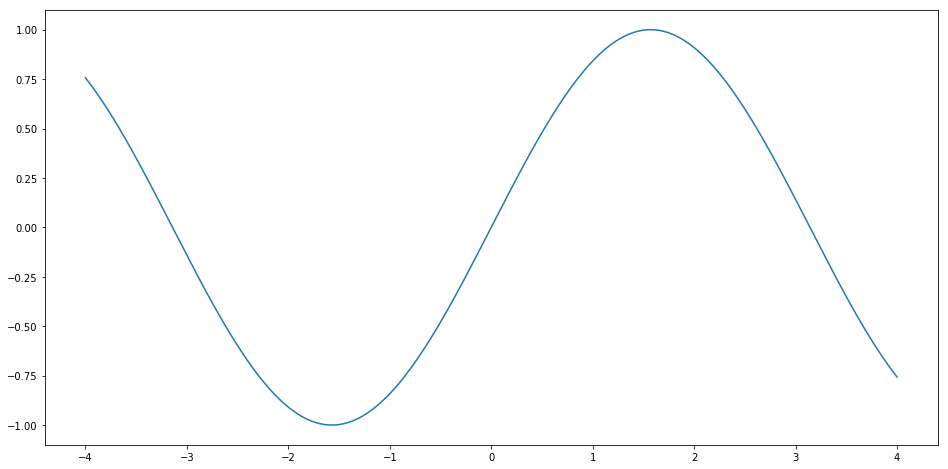

In [2]:
x = np.linspace( -4.0, 4.0, 1000 )

pp.figure( figsize = ( 16, 8 ) )
pp.plot( x, np.sin( x ) )
pp.savefig( 'difer.pdf' )

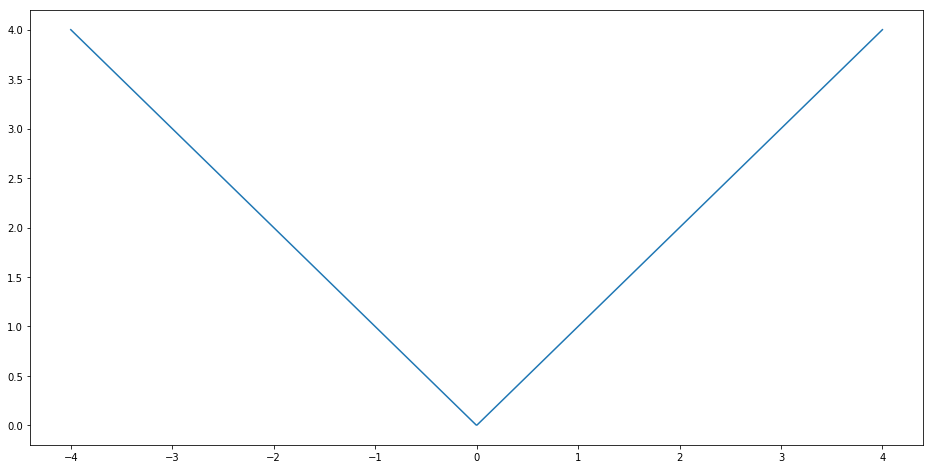

In [3]:
x = np.linspace( -4.0, 4.0, 1000 )

pp.figure( figsize = ( 16, 8 ) )
pp.plot( x, np.abs( x ) )
pp.savefig( 'ndifer.pdf' )

# Direção de descida

Dizemos que $\vect d \in \mathbb R^n$ é uma direção de descida para $f : \mathbb R^n \to \mathbb R$ a partir de $\vect x \in \mathbb R^n$ quando existe $\Lambda > 0$ tal que para todo $\lambda \in ( 0, \Lambda )$ temos que
$$
f( \vect x + \lambda \vect d ) < f( \vect x ).
$$

## Proposição:

Se $\def\f{f : \mathbb R^n \to \mathbb R}\f$ é diferenciável em $\def\x{\vect x \in \mathbb R^n}\x$ e $\nabla f( \vect x ) \neq \vect 0$ então $-\nabla f( \vect x )$ é uma direção de descida para $f$ a partir de $\vect x$.

### Prova:

$$
f( \vect x + \vect h ) = f( \vect x ) + \nabla f( \vect x )^T \vect h + \|\vect h\|E( \vect x, \vect h )
$$
com $\vect h = -\lambda\nabla f( \vect x )$ resulta, para $\lambda > 0$, em
$$
f\big( \vect x - \lambda\nabla f( \vect x ) \big) = f( \vect x ) - \lambda \| \nabla f( \vect x ) \|^2 + \lambda\|\nabla f( \vect x )\|E\bigl( \vect x, -\lambda\nabla f( \vect x ) \bigr).
$$

Como
$$
\lim_{\lambda \to 0} E\bigl( \vect x, -\lambda\nabla f( \vect x ) \bigr) = 0,
$$
sabemos que existe $\Lambda > 0$ tal que $\lambda \in ( 0, \Lambda )$ implica em
$$
E\bigl( \vect x, -\lambda\nabla f( \vect x ) \bigr) < ( 1 - \sigma )\| \nabla f( \vect x ) \|.
$$
Ou seja, para $\lambda \in ( 0, \Lambda )$ temos
$$
\begin{split}
    f\big( \vect x - \lambda\nabla f( \vect x ) \big) & {}= f( \vect x ) - \lambda \| \nabla f( \vect x ) \|^2 + \lambda\|\nabla f( \vect x )\|E\bigl( \vect x, -\lambda\nabla f( \vect x ) \bigr)\\
    & {}= f( \vect x ) + \lambda \| \nabla f( \vect x ) \|\Bigl( -\|\nabla f( \vect x )\| + E\bigl( \vect x, -\lambda\nabla f( \vect x ) \bigr) \Bigr)\\
    &{} < f( \vect x ) + \lambda \| \nabla f( \vect x ) \|\Bigl( -\|\nabla f( \vect x )\| + ( 1 - \sigma )\| \nabla f( \vect x ) \| \Bigr)\\
    &{} = f( \vect x ) - \lambda\sigma\| \nabla f( \vect x ) \|^2.
\end{split}
$$

## Corolário:

Se $\f$ é diferenciável em $\x$ e $\nabla f( \vect x ) \neq \vect 0$ então $\vect x$ não é minimizador local de $f$.

### Prova:

Como $-\nabla f( \vect x )$ é direção de descida, então podemos escolher $\lambda > 0$ tal que
$$
f\bigl( \vect x - \lambda \nabla f( \vect x ) \bigr) < f( \vect x ).
$$

## Proposição:

Se $\f$ é diferenciável em $\x$ e $\vect d^T\nabla f( \vect x ) < 0$ então $\vect d$ é uma direção de descida para $f$ a partir de $\vect x$.

In [4]:
def max_descent_fixed_step( df, x, l, eps = 1e-10, return_niter = False ):
    
    grad = df( x )
    niter = 0
    while ( np.sum( grad ** 2.0 ) ) ** 0.5 > eps:
        
        x = x - l * grad
        grad = df( x )
        
        niter = niter + 1
        
    if return_niter :
        return ( x, niter )
    else:
        return x

In [5]:
def rosenbrock( x, a = 1, b = 100 ):
    
    return ( a - x[ 0 ] ) ** 2.0 + b * ( x[ 1 ] - x[ 0 ] ** 2.0 ) ** 2.0

def rosenbrock_grad( x, a = 1, b = 100 ):
    
    retval = np.empty( 2 )
    
    retval[ 0 ] = 2.0 * ( x[ 0 ] - a ) - 4.0 * x[ 0 ] * b * ( x[ 1 ] - x[ 0 ] ** 2.0 )
    retval[ 1 ] = 2.0 * b * ( x[ 1 ] - x[ 0 ] ** 2.0 )
    
    return retval

In [6]:
x, niter = max_descent_fixed_step( 
                                   rosenbrock_grad,
                                   np.array( [ 0.0, 0.0 ] ),
                                   1e-3,
                                   return_niter = True
                                 )

print( niter )

54363


In [7]:
def max_descent_armijo_step( f, df, x, l, beta = 0.1, sigma = 0.1, eps = 1e-10, return_niter = False ):
    
    grad = df( x )
    f_x = f( x )
    grad_sq = np.sum( grad ** 2.0 )
    niter = 0
    nfeval = 1
    while grad_sq ** 0.5 > eps:
        
        desc = sigma * grad_sq

        l_k = l        
        x_next = x - l_k * grad
        f_x_next = f( x_next )
        nfeval = nfeval + 1
        while f_x_next >= f_x - l_k * desc:
            l_k = l_k * beta
            x_next = x - l_k * grad
            f_x_next = f( x_next )
            nfeval = nfeval + 1
        
        niter = niter + 1

        x = x_next
        grad = df( x )
        grad_sq = np.sum( grad ** 2.0 )
        f_x = f_x_next
    
    if return_niter :
        return ( x, niter, nfeval )
    else:
        return x

In [8]:
x, niter, nfeval = max_descent_armijo_step( 
                                           rosenbrock,
                                           rosenbrock_grad,
                                           np.array( [ 0.0, 0.0 ] ),
                                           1.0,
                                           return_niter = True,
                                           sigma = 0.1,
                                           beta = 1e-1
                                         )

print( niter + nfeval )
print( niter )
print( nfeval / niter )
print( x )

3790
851
3.45358401880141
[1. 1.]


In [9]:
def max_descent_armijo_step_graph( f, df, x, l, beta = 0.1, sigma = 0.1, maxiter = 2, return_niter = False ):
    
    grad = df( x )
    f_x = f( x )
    grad_sq = np.sum( grad ** 2.0 )
    niter = 0
    nfeval = 1
    
    L = 0.11
    l_samples = np.linspace( 0, L )
    
    while niter < maxiter:
        
        desc = sigma * grad_sq

        pp.figure( figsize = ( 8, 4 ) )
        def g( l ):
            return f( x - l * grad )
        g_l_samples = []
        for i in range( len( l_samples ) ):
            g_l_samples.append( g( l_samples[ i ] ) )
        pp.plot( l_samples, g_l_samples )
        pp.plot( l_samples, f_x - l_samples * desc )
        mx = max( g_l_samples )
        mn = min( g_l_samples )
        

        l_k = l        
        x_next = x - l_k * grad
        if l_k <= L:
            pp.scatter( l_k, g( l_k ), color = pp.gca().lines[ 0 ].get_color() )
            pp.scatter( l_k, f_x - l_k * desc, color = pp.gca().lines[ 1 ].get_color() )
        
        f_x_next = f( x_next )
        nfeval = nfeval + 1
        while f_x_next >= f_x - l_k * desc:
            l_k = l_k * beta
            x_next = x - l_k * grad
            f_x_next = f( x_next )
            nfeval = nfeval + 1
            if l_k <= L:
                pp.scatter( l_k, g( l_k ), color = pp.gca().lines[ 0 ].get_color() )
                pp.scatter( l_k, f_x - l_k * desc, color = pp.gca().lines[ 1 ].get_color() )

        
        niter = niter + 1

        x = x_next
        grad = df( x )
        grad_sq = np.sum( grad ** 2.0 )
        f_x = f_x_next
    
    if return_niter :
        return ( x, niter, nfeval )
    else:
        return x

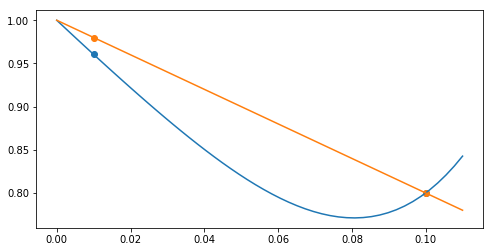

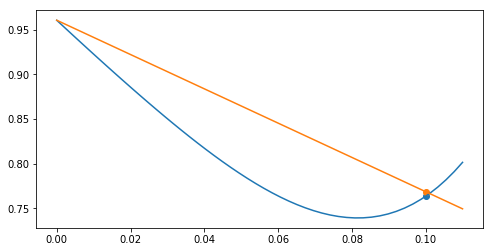

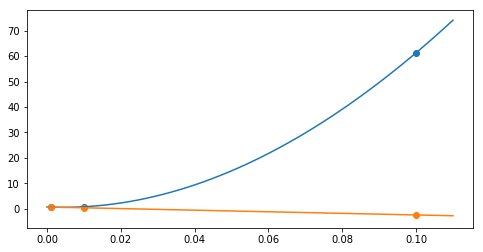

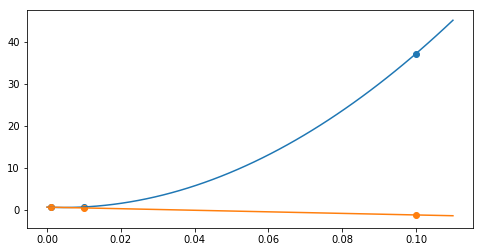

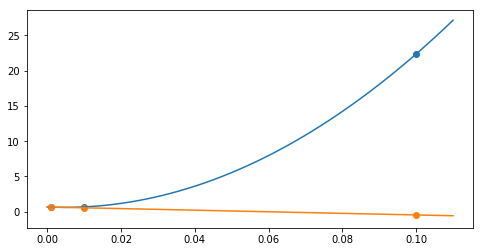

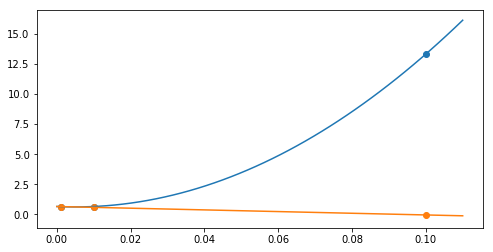

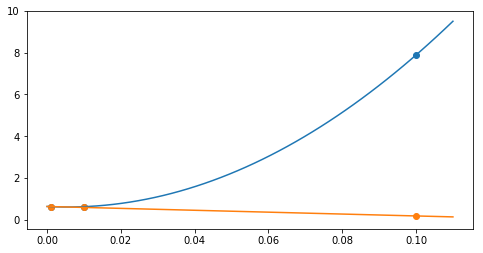

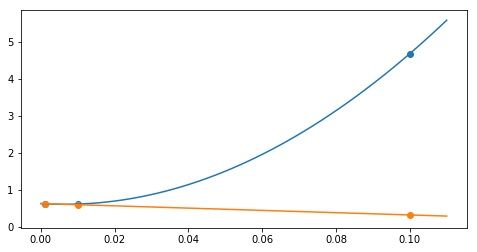

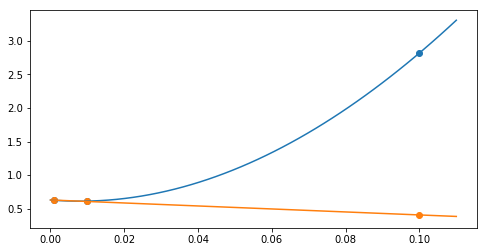

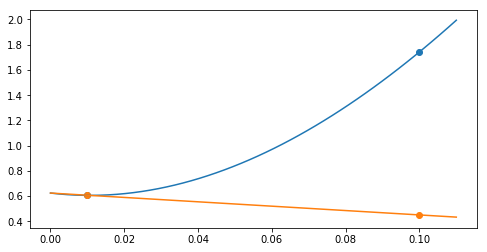

In [10]:
x, niter, nfeval = max_descent_armijo_step_graph( 
                                           rosenbrock,
                                           rosenbrock_grad,
                                           np.array( [ 0.0, 0.0 ] ),
                                           1.0,
                                           return_niter = True,
                                           sigma = 0.5,
                                           beta = 1e-1,
                                           maxiter = 10
                                         )